In [2]:
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [4]:
pima=pd.read_csv(url,header=None,names=col_names)

In [5]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
pima.shape

(768, 9)

In [7]:
feature_cols=['pregnant','insulin','bmi','age']
X=pima[feature_cols]
y=pima.label

In [9]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [10]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
y_pred_class=logreg.predict(X_test)

In [12]:
from sklearn import metrics
print (metrics.accuracy_score(y_test,y_pred_class))

0.692708333333


In [13]:
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [15]:
1-y_test.mean()

0.6770833333333333

In [16]:
max(y_test.mean(),(1-y_test.mean()))

0.6770833333333333

In [18]:
y_test.value_counts().head()/len(y_test)

0    0.677083
1    0.322917
Name: label, dtype: float64

In [21]:
print ('True:',y_test.values[0:25])
print ('Pred:',y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [24]:
print (metrics.confusion_matrix(y_test,y_pred_class))

[[118  12]
 [ 47  15]]


In [25]:
print ('True:',y_test.values[0:25])
print ('Pred:',y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [26]:
confusion=metrics.confusion_matrix(y_test,y_pred_class)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [29]:
print ("Classification Accuracy")
print ((TP+TN)/float(TP+TN+FP+FN))
print (metrics.accuracy_score(y_test,y_pred_class))

Classification Accuracy
0.692708333333
0.692708333333


In [31]:
print("Misclassification Rate/Classification Error")
print ((FP+FN)/(float(TP+TN+FP+FN)))
print (1-(metrics.accuracy_score(y_test,y_pred_class)))

Misclassification Rate/Classification Error
0.307291666667
0.307291666667


In [33]:
print ("Sensitivity/TP rate/Recall")
print (TP/(float(TP+FN)))
print (metrics.recall_score(y_test,y_pred_class))

Sensitivity/TP rate/Recall
0.241935483871
0.241935483871


In [36]:
print ("Specificity")
print (TN/(float(TN+FP)))

Specificity
0.907692307692


In [35]:
print ("FP Rate")
print (FP/(float(TN+FP)))

FP Rate
0.0923076923077


In [38]:
print ("Precision")
print (TP/float(TP+FP))
print (metrics.precision_score(y_test,y_pred_class))

Precision
0.555555555556
0.555555555556


In [44]:
logreg.predict(X_test)[0:10]


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [45]:
logreg.predict_proba(X_test)[0:10,:]

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [47]:
logreg.predict_proba(X_test)[0:10,1]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [48]:
y_pred_prob=logreg.predict_proba(X_test)[:,1]

In [1]:
plt.rcParams['font.size']=14

NameError: name 'plt' is not defined

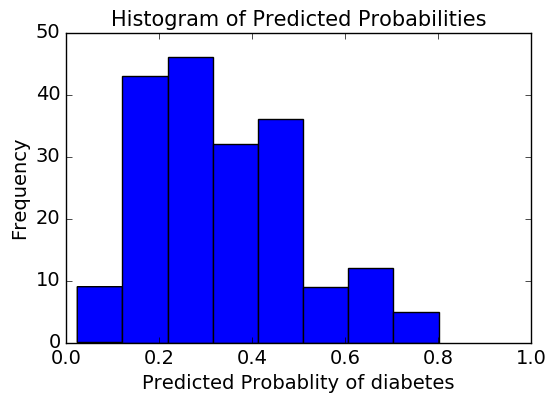

In [61]:
plt.hist(y_pred_prob,bins=8)
plt.xlim(0,1)
plt.ylim(0,50)
plt.title('Histogram of Predicted Probabilities',size=15)
plt.xlabel('Predicted Probablity of diabetes')
plt.ylabel('Frequency')

In [62]:
from sklearn.preprocessing import binarize
y_pred_class=binarize([y_pred_prob],0.3)[0]

In [64]:
y_pred_class[0:10]

array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.])

In [65]:
print(confusion)

[[118  12]
 [ 47  15]]


In [66]:
print(metrics.confusion_matrix(y_test,y_pred_class))

[[80 50]
 [16 46]]


In [67]:
print (46/(float(46+16)))

0.7419354838709677


In [68]:
print (80/float(130))

0.6153846153846154


In [72]:
?metrics.roc_curve

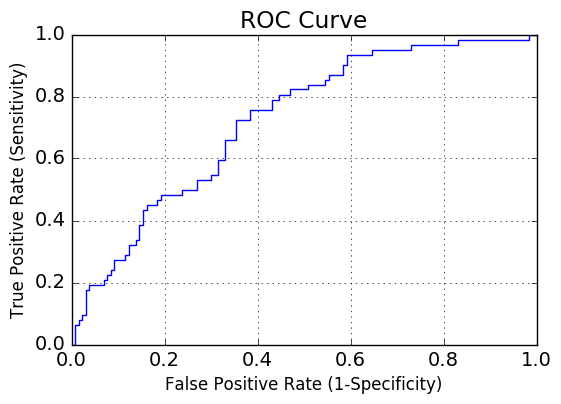

In [75]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1-Specificity)',size=12)
plt.ylabel('True Positive Rate (Sensitivity)',size=12)
plt.grid(True)

In [78]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [79]:
evaluate_threshold(0.5)

Sensitivity: 0.241935483871
Specificity: 0.907692307692


In [82]:
evaluate_threshold(0.3)

Sensitivity: 0.725806451613
Specificity: 0.615384615385


In [83]:
print (metrics.roc_auc_score(y_test,y_pred_prob))

0.724565756824


In [84]:
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg,X,y,cv=10,scoring='roc_auc').mean()

0.73782336182336183